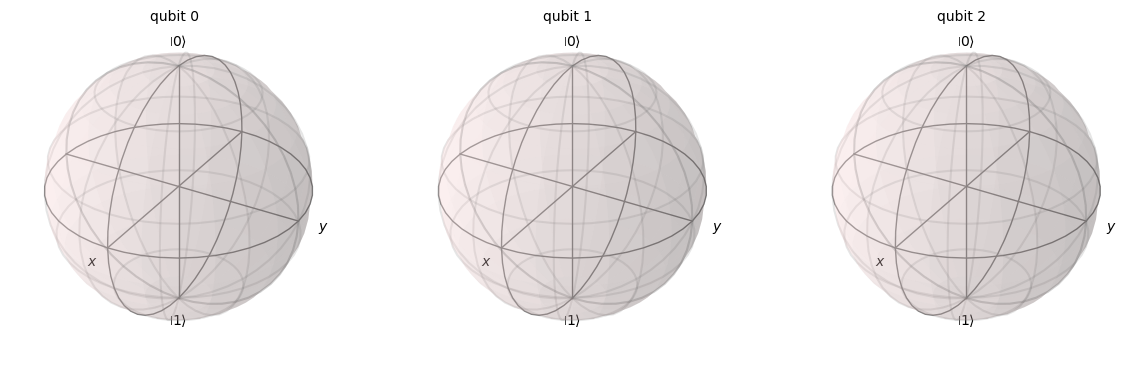

In [1]:
from qiskit import QuantumCircuit, transpile, Aer, execute
from qiskit.visualization import plot_bloch_multivector
from qiskit.providers.aer.noise import depolarizing_error
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0, 1)
qc.z(2)
qc.cx(1, 2)
error_prob = 0.1 
error_hadamard = depolarizing_error(error_prob, 1)
error_cx = depolarizing_error(error_prob, 2)  
qc.append(error_hadamard, [0])
qc.append(error_cx, [0, 1])
qc.append(error_cx, [1, 2])
qc.append(error_cx, [0, 1])
qc.append(error_cx, [1, 2])
qc.append(error_hadamard, [0])
simulator = Aer.get_backend('statevector_simulator')
qc_transpiled = transpile(qc, simulator)
job = execute(qc_transpiled, simulator)
result = job.result()
statevector = result.get_statevector()
plot_bloch_multivector(statevector)

        ┌───┐                ░ ┌─┐      
   q_0: ┤ H ├──■────■────────░─┤M├──────
        └───┘┌─┴─┐  │  ┌───┐ ░ └╥┘┌─┐   
   q_1: ─────┤ X ├──■──┤ H ├─░──╫─┤M├───
             └───┘┌─┴─┐├───┤ ░  ║ └╥┘┌─┐
   q_2: ──────────┤ X ├┤ X ├─░──╫──╫─┤M├
                  └───┘└───┘ ░  ║  ║ └╥┘
meas: 3/════════════════════════╩══╩══╩═
                                0  1  2 
Measurement results: {'100': 239, '110': 243, '011': 269, '001': 273}


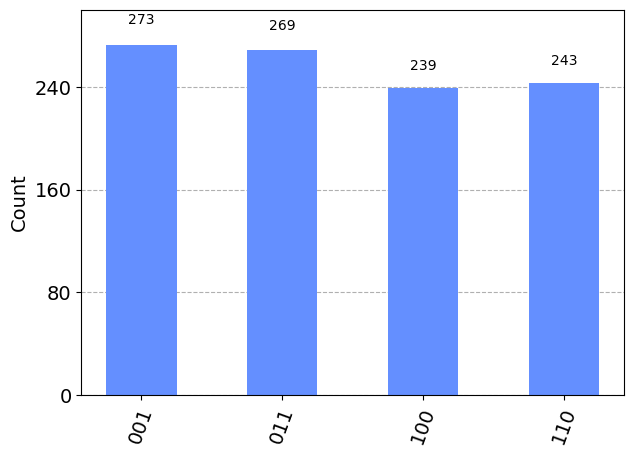

In [2]:
import numpy as np
from qiskit import QuantumCircuit, Aer, transpile, assemble, execute
from qiskit.visualization import plot_histogram
from qiskit.providers.aer import AerSimulator
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0, 1)
qc.ccx(0, 1, 2)
qc.h(1)
qc.x(2)
qc.measure_all()
print(qc)
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit)
result = job.result()
counts = result.get_counts()
print("Measurement results:", counts)
plot_histogram(counts)